$\textbf{Estimation Software:}$: Ordinary Least Squares (OLS)

To use OLS, it is easiest to download and use the LeSage Spatial Econometrics Toolbox.
It can be found on the website:   https://www.spatial-econometrics.com/
Download version 7 into a folder, eg, C:\LeSage7, or anywhere else in your system. Then add in the command 
addpath(genpath('C:\LeSage7'));
at the start of your session.  Simple.
After you have finished your estimation, you should remove the LeSage7 path with the matlab command,
rmpath('C:\LeSage7');

However, if you have the Stats and Econoetrics toolboxes with Matlab, we can make use of packages contained in these programs. 

We will show examples with both


$\textbf{Empirical Exercise-Week 1}$  Page 91, Problem 2.26
Lets look at another example from your book, relating food expenditure to income and an indicator variable for education.  

In [4]:
clear all
Tab1 = readtable('cex5_small.csv'); warning off;
%   This is a tabular data file

In [3]:
size(Tab1);
Tab1(1:5,1:end)


ans =

  5x10 table

    advanced    alcbev    appar    college    entert     food     foodaway    health    income    smsa
    ________    ______    _____    _______    ______    ______    ________    ______    ______    ____

       0        11.11         0       0       43.44       9.63      47.56      58.22     123.7     1  
       0            0      6.22       0       17.56      94.22      77.04       3.33     59.68     1  
       0           10         0       1           5      38.52      39.81      33.33     80.99     1  
       0        11.11     29.44       1          20     173.33          0     130.59    133.24     1  
       0            0     22.44       1          56     173.33     108.33     135.11     81.01     0  




foodaway is expenditures on Food away from home and income is household monthly income in $100 units. foodaway is in column 7 and income in column 9. Health expenditures are in column 8. So define the variables:

In [5]:
foodaway = Tab1(:,7); income = Tab1(:,9);  health = Tab1(:,8);

Change the format of both variables to a real "array" number from a table format.

In [3]:
foodaway1 = table2array(foodaway); income1 = table2array(income); 
health1 = table2array(health);

It is always good to look at the data first. We plot the historgram for each variable.

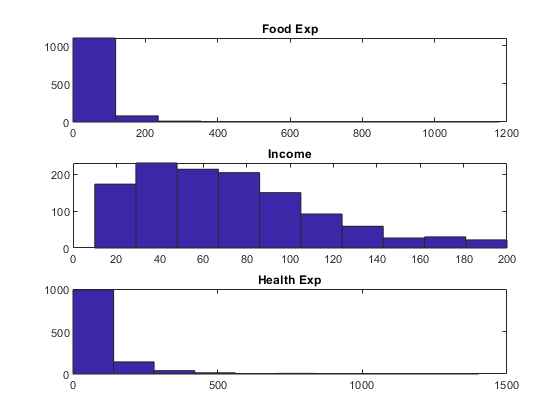

In [4]:
subplot(311); hist(foodaway1); title('Food Exp'); subplot(312); 
hist(income1); title('Income'); subplot(313); hist(health1); 
title('Health Exp');

Look at some of the statistics

In [5]:
[mean(foodaway1) std(foodaway1); mean(income1) std(income1)] 
[mean(health1) std(health1)]


ans =

   49.2709   65.2836
   72.1426   41.6523


ans =

   84.1471  124.5632




We see that foodaway has higher volatility than income but a lower mean.

Now lets setup a regression. Simple one.

Lets do a regression of foodaway1 on a constant term and income1.

In [6]:
x1 = ones(1200,1);
xx = [x1 income1];yy = foodaway1;

In [8]:
who


Your variables are:

Tab1       ans        foodaway   foodaway1  health     health1    income     income1    x1         xx         yy         




In [7]:
addpath(genpath('c:\LeSage7'));
help ols

  PURPOSE: least-squares regression 
 ---------------------------------------------------
  USAGE: results = ols(y,x)
  where: y = dependent variable vector    (nobs x 1)
         x = independent variables matrix (nobs x nvar)
 ---------------------------------------------------
  RETURNS: a structure
         results.meth  = 'ols'
         results.beta  = bhat     (nvar x 1)
         results.tstat = t-stats  (nvar x 1)
         results.bstd  = std deviations for bhat (nvar x 1)
         results.yhat  = yhat     (nobs x 1)
         results.resid = residuals (nobs x 1)
         results.sige  = e'*e/(n-k)   scalar
         results.rsqr  = rsquared     scalar
         results.rbar  = rbar-squared scalar
         results.dw    = Durbin-Watson Statistic
         results.nobs  = nobs
         results.nvar  = nvars
         results.y     = y data vector (nobs x 1)
         results.bint  = (nvar x2 ) vector with 95% confidence intervals on beta
 ------------------------------------------------

In [8]:
results = ols(yy,xx);
beta = results.beta;
beta


beta =

   13.7138
    0.4929




In [ ]:
who

In [11]:
tstat = results.tstat


tstat =

    3.8301
   11.4658




Now lets do a regression of foodaway1 on a constant and an indicator variable, advanced.

In [12]:
advanced = Tab1(:,1); advanced1 = table2array(advanced); 
xxx = [x1 advanced1];

In [13]:
result1 = ols(yy,xxx);

In [14]:
beta1 = result1.beta


beta1 =

   42.7616
   30.3933




Answer to question: mean expenditures on food away for a household with an advanced degree is 42.7616 + 30.3933. For a household with no advanced degree, it is 42.7616. So we can conclude that households with advanced degree members spend a lot more on food away from home. Now a good exercise is to see if the households with advanced degrees spend more on health. Do a similar regression, defining the new variable health1 as the dependent variable. A good exercise is to plot the residuals. We learn a lot from the residuals. Lets do it for the regression of food expenditures on income.

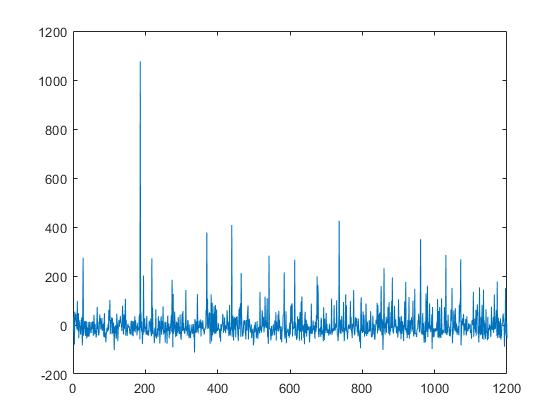

In [15]:
ehat = results.resid;
plot(ehat)

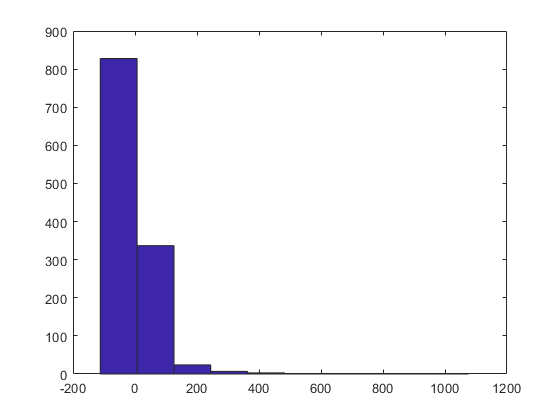

In [16]:
hist(ehat)

We will come back to further discussion. We are now just working with the simple linear model.

In [17]:
help regress

 REGRESS Multiple linear regression using least squares.
    B = REGRESS(Y,X) returns the vector B of regression coefficients in the
    linear model Y = X*B.  X is an n-by-p design matrix, with rows
    corresponding to observations and columns to predictor variables.  Y is
    an n-by-1 vector of response observations.
 
    [B,BINT] = REGRESS(Y,X) returns a matrix BINT of 95% confidence
    intervals for B.
 
    [B,BINT,R] = REGRESS(Y,X) returns a vector R of residuals.
 
    [B,BINT,R,RINT] = REGRESS(Y,X) returns a matrix RINT of intervals that
    can be used to diagnose outliers.  If RINT(i,:) does not contain zero,
    then the i-th residual is larger than would be expected, at the 5%
    significance level.  This is evidence that the I-th observation is an
    outlier.
 
    [B,BINT,R,RINT,STATS] = REGRESS(Y,X) returns a vector STATS containing, in
    the following order, the R-square statistic, the F statistic and p value
    for the full model, and an estimate of the error 

In [18]:
[B,BINT,R,RINT,STATS] =  regress(yy,xx);

In [19]:
[B BINT]


ans =

   13.7138    6.6891   20.7386
    0.4929    0.4085    0.5772




The cell above gives the intercept and slope, as well as their 95 confidence intervals.

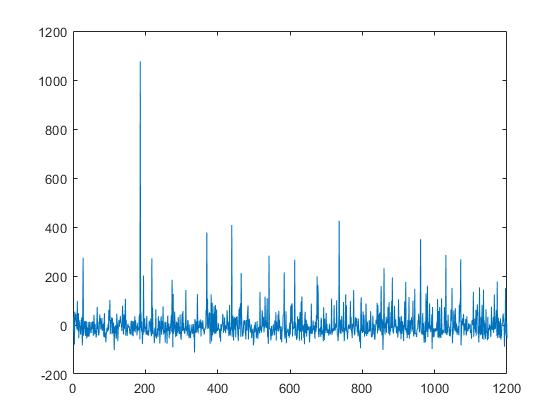

In [19]:
plot(R);  % Plot residuals again
save Output_Week1;  % Save regression results from week 1

In [20]:
who



Your variables are:

B          RINT       advanced   beta       foodaway   health1    result1    x1         yy         
BINT       STATS      advanced1  beta1      foodaway1  income     results    xx         
R          Tab1       ans        ehat       health     income1    tstat      xxx        




When we take the log of foodaway1, some observations are zero so we cannot take a log of zero.  This is the problem with the use of logs.  One way to get around this is to add a constant to make the smallest observation equal to 1, not zero, and take the logs.

In [21]:
min(foodaway1)
xxx = [x1 log(income1)]; yyy = log(foodaway1+1);



ans =

     0




In [22]:
[B,BINT,R,RINT,STATS] =  regress(yyy,xxx);

In [22]:
[B BINT]


ans =

   -0.1777   -0.7133    0.3580
    0.8107    0.6815    0.9399




In [23]:
STATS


STATS =

    0.1123  151.5081    0.0000    2.1194




In [24]:
1-var(R)/var(yyy)


ans =

    0.1123




The coefficient of variation or overall explanatory power of the model is .11.  Far away from a perfect fit of 1.  But better than nothing.  The overall F-stat and the p-value for the F-stat show that the model is more than just a constant term, that we have significant, thought small, explanatory power.